In [ ]:
import os
import cv2
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/keggle_dataset'

In [ ]:
%cd /content/drive/MyDrive/keggle_dataset

/content/drive/MyDrive/keggle_dataset


In [ ]:
!ls

kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:26<00:00, 39.2MB/s]
100% 2.29G/2.29G [00:26<00:00, 91.6MB/s]


In [ ]:
!mkdir chest-xray-pneumonia

In [ ]:
!mv chest-xray-pneumonia.zip chest-xray-pneumonia

In [ ]:
%cd chest-xray-pneumonia/

/content/drive/MyDrive/keggle_dataset/chest-xray-pneumonia


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/keggle_dataset/chest-xray-pneumonia/chest_xray/train'
TEST_DIR = '/content/drive/MyDrive/keggle_dataset/chest-xray-pneumonia/chest_xray/test'
VALID_DIR = '/content/drive/MyDrive/keggle_dataset/chest-xray-pneumonia/chest_xray/val'

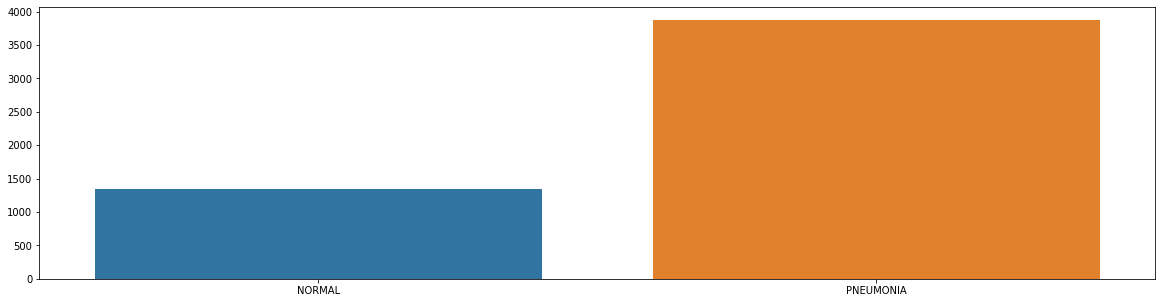

In [ ]:
CLASS_NAME = []
CLASS_COUNT = []
TRAIN_EXAMPLE = 0
for folder in os.listdir(TRAIN_DIR): 
  FILES = gb.glob(pathname=str(TRAIN_DIR + "//" + folder + "/*"))
  CLASS_NAME.append(folder)
  CLASS_COUNT.append(len(FILES))
  TRAIN_EXAMPLE += len(FILES)
plt.figure(figsize=(20,5))
sns.barplot(x=CLASS_NAME, y=CLASS_COUNT)
plt.show()

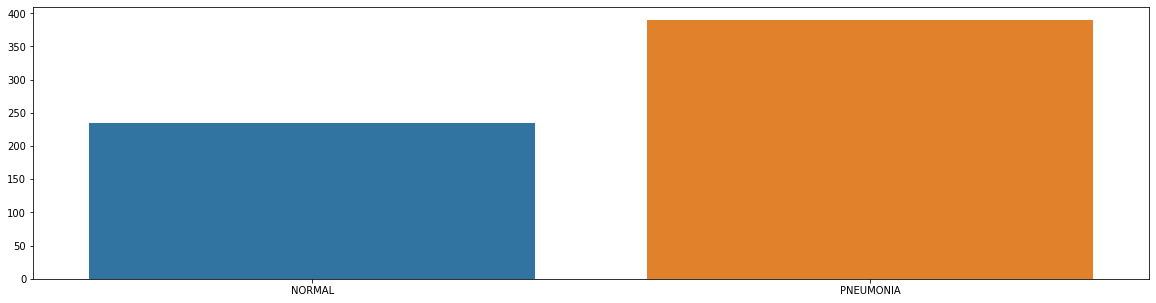

In [ ]:
CLASS_NAME = []
CLASS_COUNT = []
TEST_EXAMPLE = 0
for folder in os.listdir(TEST_DIR): 
  FILES = gb.glob(pathname=str(TEST_DIR + "//" + folder + "/*"))
  CLASS_NAME.append(folder)
  CLASS_COUNT.append(len(FILES))
  TEST_EXAMPLE += len(FILES)
plt.figure(figsize=(20,5))
sns.barplot(x=CLASS_NAME, y=CLASS_COUNT)
plt.show()

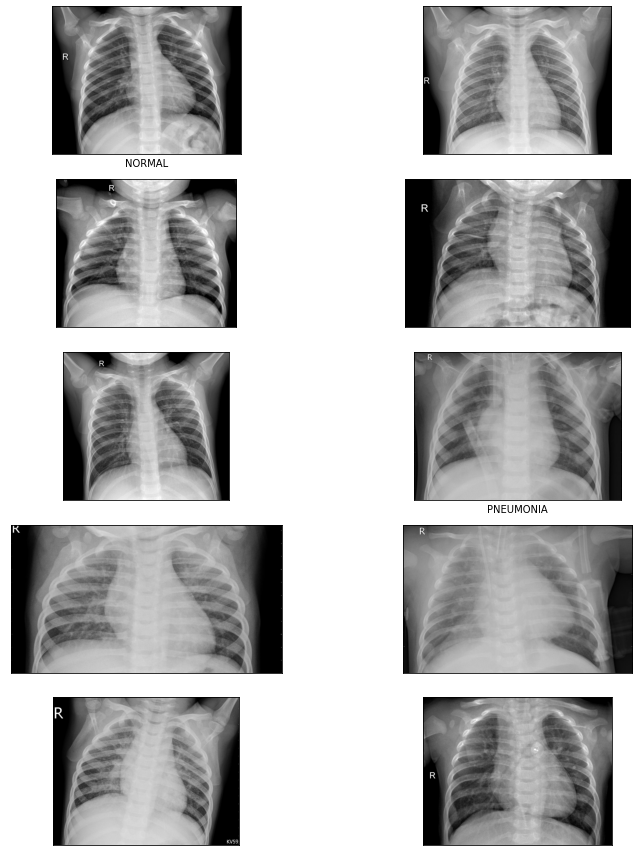

In [ ]:
plt.figure(figsize=(12, 12))
i=0
for category in os.listdir(TRAIN_DIR):  
  path = os.path.join(TRAIN_DIR, category)
  for image in os.listdir(path):  
    image_array = cv2.cvtColor(cv2.imread(os.path.join(path, image)), cv2.COLOR_BGR2RGB)
    plt.subplot(5, 2, i+1)
    plt.imshow(image_array)
    plt.xticks([])
    plt.yticks([])
    if i%5 == 0:  
      plt.xlabel(category)
    i += 1
    if i%5 == 0:  
      break
plt.tight_layout()
plt.show()

In [ ]:
IMAGE_SIZE = 160
BATCH_SIZE = 64 #Number of image process at a time.

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(TRAIN_DIR,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 5216 files belonging to 2 classes.


In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(TEST_DIR,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 624 files belonging to 2 classes.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(VALID_DIR,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 16 files belonging to 2 classes.


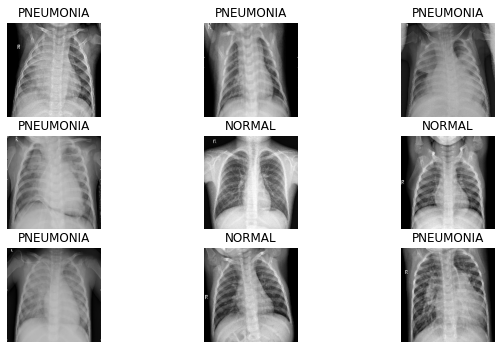

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    #print(labels[i])
    ax = plt.subplot(5, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2)
])

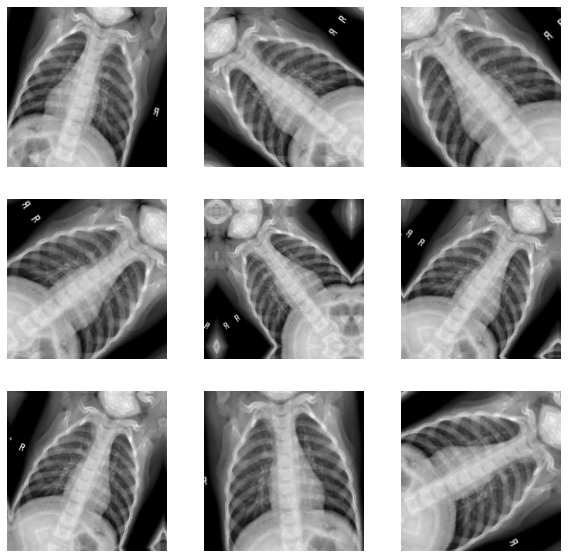

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
IMAGE_SHAPE = (IMAGE_SIZE,IMAGE_SIZE) + (3,)
base_model = tf.keras.applications.VGG16(input_shape=IMAGE_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

In [ ]:
base_model.trainable = False

In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.vgg16.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 160, 160, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 160, 160, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                      

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=40,
                    validation_data=validation_dataset)

Epoch 1/40
82/82 [==============================] - 69s 567ms/step - loss: 0.7407 - accuracy: 0.5132 - val_loss: 0.8566 - val_accuracy: 0.5000
Epoch 2/40
82/82 [==============================] - 40s 446ms/step - loss: 0.4788 - accuracy: 0.7048 - val_loss: 0.6107 - val_accuracy: 0.5000
Epoch 3/40
82/82 [==============================] - 40s 441ms/step - loss: 0.4158 - accuracy: 0.7605 - val_loss: 0.5055 - val_accuracy: 0.6875
Epoch 4/40
82/82 [==============================] - 39s 437ms/step - loss: 0.3626 - accuracy: 0.8073 - val_loss: 0.4389 - val_accuracy: 0.7500
Epoch 5/40
82/82 [==============================] - 40s 442ms/step - loss: 0.3308 - accuracy: 0.8269 - val_loss: 0.4148 - val_accuracy: 0.7500
Epoch 6/40
82/82 [==============================] - 39s 436ms/step - loss: 0.3024 - accuracy: 0.8472 - val_loss: 0.4355 - val_accuracy: 0.6875
Epoch 7/40
82/82 [==============================] - 38s 425ms/step - loss: 0.2739 - accuracy: 0.8602 - val_loss: 0.4342 - val_accuracy: 0.6875

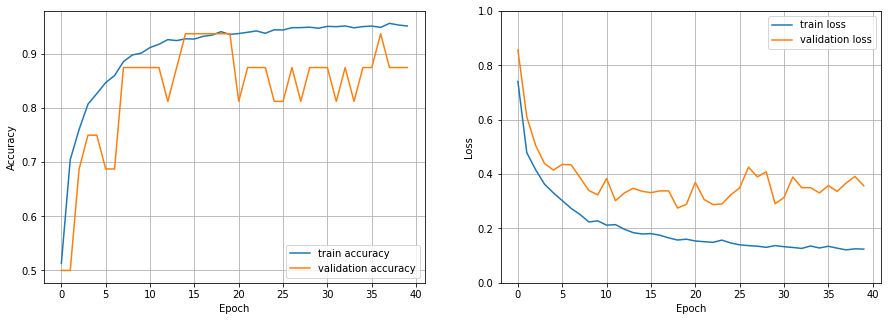

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],  label='train accuracy')
plt.plot(history.history['val_accuracy'],  label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],  label='train loss')
plt.plot(history.history['val_loss'],  label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.ylim([0,1])
plt.legend(loc='upper right')

plt.show()